# **Moving Average Filters for Time Series Data** - Introduction

Done by: Siddharth Sudhakar (Roll no.: 25901335)


In this notebook, I have demonstrated the use of moving average (MA) filters. The key idea is to reduce noise by replacing each data point with the average of its neighbors. This smooths out short-term fluctuations while retaining the overall trend.

I will demonstrate this concept using the application of sounding rockets. Sounding rockets are unguided, solid-fuel rockets that carry scientific instruments into the upper atmosphere and space on a parabolic, sub-orbital trajectory to conduct experiments and gather data. For this project, I will use synthetic rocket flight pressure data. The rocket is assumed to climb to around 10,000 ft above ground level and then descend under parachute. The raw pressure measurements include random noise, similar to what real sensors might record during flight.

I specifically implement:

- **1st Order Moving Average (MA1):** Each output sample is just the current input sample.  
  (No smoothing effect, serves as a baseline.)
- **2nd Order Moving Average (MA2):** Each output sample is the average of the current and previous
  input samples.  
  (This introduces basic smoothing, reducing noise slightly.)
- **7th Order Moving Average (MA7):** Each output sample is the average of the current and previous 6 samples.  
  (This produces strong smoothing.)

The results will show how higher-order moving averages can progressively smooth a signal, but also introduce lag and reduce sharp features.

# Importing Libraries

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Generating Data

In [4]:
fs = 10 # Samples per second

In [5]:
T = 60 # Simulate one minute

In [6]:
t = np.linspace(0,T, T*fs)

In [7]:
altitude = np.piecewise(t,
    [t < 30, t >= 30],
    [lambda x: (3000/30)*x,             # ascent to ~3000 m which is roughly 10k ft.
     lambda x: 3000 - (3000/30)*(x-30)])# descent

In [8]:
P0, H = 101325, 8500
pressure = P0 * np.exp(-altitude/H) # Convert alt to pressure

In [9]:
noise = np.random.normal(0, 200, size=len(t)) # Adding noise
pressure_noisy = pressure + noise

# Defining the Moving Average Function

In [10]:
# Moving Average Function
def moving_average(signal, order):
    N = order
    result = np.zeros_like(signal)
    for i in range(len(signal)):
        if i < N-1:
            result[i] = np.mean(signal[:i+1])  # for when there aren't enough samples yet
        else:
            result[i] = np.mean(signal[i-N+1:i+1])
    return result

In [11]:
ma1 = moving_average(pressure_noisy, order=1)
ma2 = moving_average(pressure_noisy, order=2)
ma7 = moving_average(pressure_noisy, order=7)

# Plotting the Output

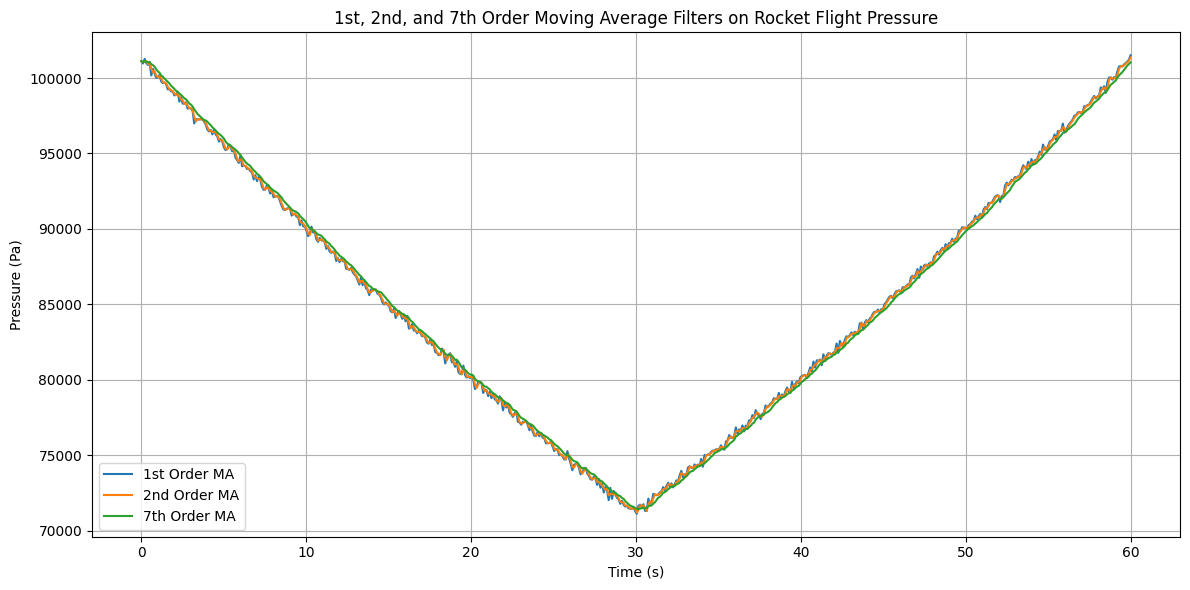

In [14]:
plt.figure(figsize=(12,6))

plt.plot(t, ma1, label="1st Order MA")
plt.plot(t, ma2, label="2nd Order MA")
plt.plot(t, ma7, label="7th Order MA")

plt.xlabel("Time (s)")
plt.ylabel("Pressure (Pa)")
plt.title("1st, 2nd, and 7th Order Moving Average Filters on Rocket Flight Pressure")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()